# Finding the optimal split 



1. Find the best partition for `default ~ balance` to a random subset of 1000 rows of the default data from the ISLR library.


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn import tree
from graphviz import Source
import graphviz

from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier, export_graphviz

In [2]:
df = pd.read_csv('../data/Default.csv')
df = df.sample(n=1000, random_state=1)
df["default"].value_counts()

No     967
Yes     33
Name: default, dtype: int64

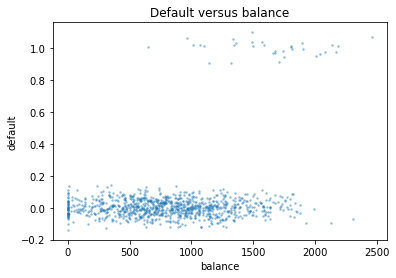

In [3]:
#add jitter to your plot:
N = df.shape[0]
df["default2"] = df["default"] == "Yes"
df["defaultJitter"] = df["default2"] + 0.05*np.random.randn(N)
plt.scatter(df["balance"], df["defaultJitter"],s = 2.5, alpha=0.35)
plt.xlabel('balance')
plt.ylabel('default')
plt.title('Default versus balance')
#plt.legend(['specificity', 'sensitivity'],fontsize=14)
plt.show();

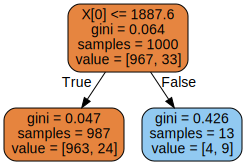

In [4]:
clf = tree.DecisionTreeClassifier(max_depth=1)
clf = clf.fit(df[["balance","income"]], df["default"])

dot_data = tree.export_graphviz(clf, out_file=None,
                                #feature_names=iris.feature_names, 
                                precision = 3,
                    filled=True, rounded=True)  
graph = graphviz.Source(dot_data)  
graph 